In [2]:
from homerisk_model import *

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.style as style

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

%matplotlib inline

In [3]:
style.use('fivethirtyeight')

In [4]:
train = pd.read_csv('./application_train.csv.zip')
priors = prepare_previous_loans()
train = pd.merge(train, priors, on=['SK_ID_CURR'], how='left')

In [5]:
rf = RandomForestClassifier(n_estimators=30)
y = train.TARGET
cols = [ c for c in train.columns if c!='TARGET' ]
train_dummies = pd.get_dummies(train[cols])
rf.fit(train_dummies.fillna(0), y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [6]:
df = pd.DataFrame(zip(train_dummies.columns, rf.feature_importances_),columns=['Column','Importance'])
df.sort_values(by='Importance', ascending=False).head(20)

,Column,Importance
29,EXT_SOURCE_2,0.031031
30,EXT_SOURCE_3,0.023184
7,DAYS_BIRTH,0.017669
9,DAYS_REGISTRATION,0.016435
10,DAYS_ID_PUBLISH,0.016373
0,SK_ID_CURR,0.015303
123,prev_pct_credit_app,0.014981
8,DAYS_EMPLOYED,0.014968
4,AMT_ANNUITY,0.014474
144,lastloan_PREV_SK_ID_PREV_max,0.014376


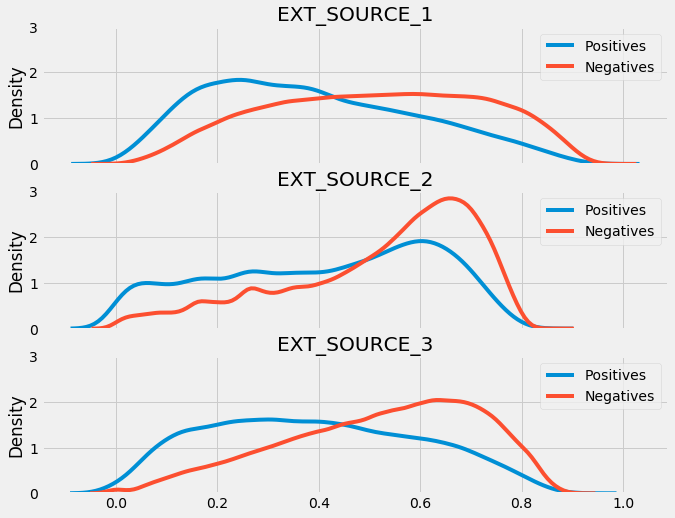

In [27]:
fig, ax = plt.subplots(3,1,figsize=(10,8),sharex=True,sharey=True)
exts = ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']
for i, xx in enumerate(exts):
    pos = train[(~train[xx].isnull()) & (train.TARGET==1)][xx]
    neg = train[(~train[xx].isnull()) & (train.TARGET==0)][xx]
    _ = ax[i].set_title(xx)
    _ = ax[i].set_ylabel('Density')
    _ = ax[i].set_xlabel('')
    _ = ax[i].set_ylim(0,3)
    _ = sns.kdeplot(pos, label='Positives', ax=ax[i])
    _ = sns.kdeplot(neg, label='Negatives', ax=ax[i])

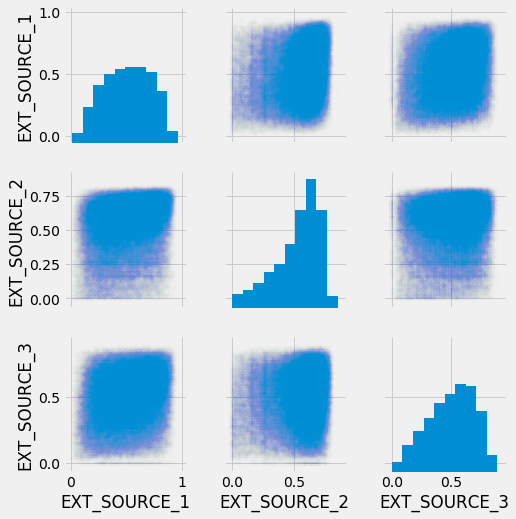

In [28]:
tr = train.dropna(subset=exts)
sns.pairplot(tr[exts],
             markers=['+'],
            plot_kws=dict(linewidth=0.01))

In [19]:
def make_kdeplot(m):
    fig, ax = plt.subplots(1,1,figsize=(6,4))
    pos = train[(~train[m].isnull()) & (train.TARGET==1)][m]
    neg = train[(~train[m].isnull()) & (train.TARGET==0)][m]
    _ = sns.kdeplot(pos, label='Positives', ax=ax)
    _ = sns.kdeplot(neg, label='Negatives', ax=ax)
    _ = ax.set_title(m)
    _ = ax.set_ylabel('Density')

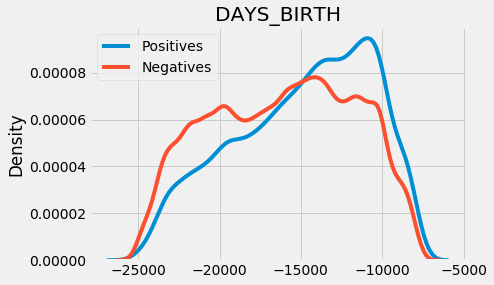

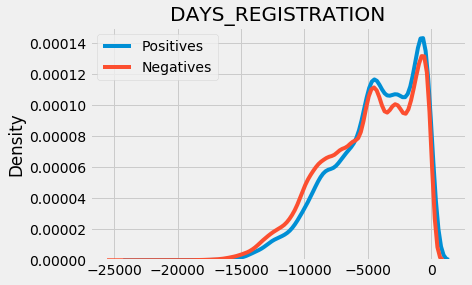

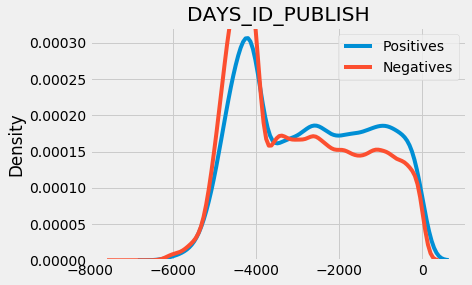

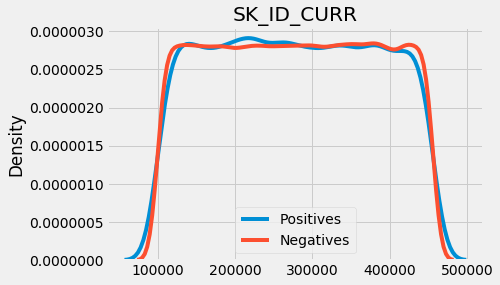

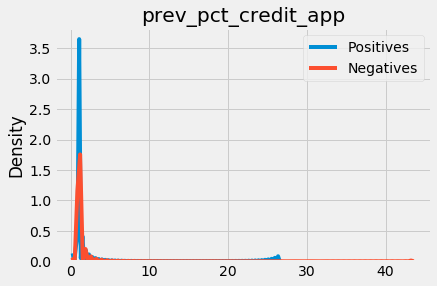

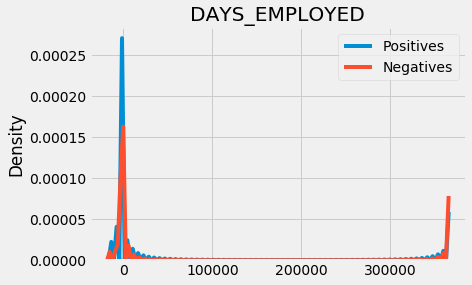

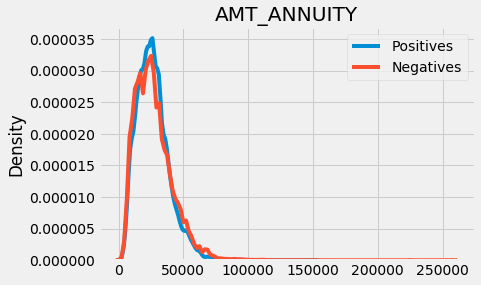

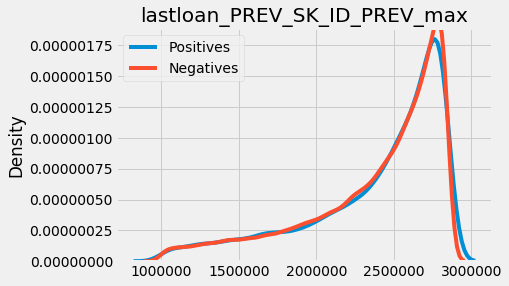

In [29]:
for c in df.sort_values(by='Importance', ascending=False).head(10).Column.values:
    if c not in exts:
        make_kdeplot(c)